In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyedhrec import EDHRec


import sys
sys.path.append('../')

from utils import edhrec_requests as edh
from utils import funciones
from utils import graficos

In [2]:
#Cargamos la base de datos de cartas
df_bd = pd.read_csv("../data/cartas_limpiadas.csv")
df_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28369 entries, 0 to 28368
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            28369 non-null  object 
 1   type_line       28369 non-null  object 
 2   set             28369 non-null  object 
 3   set_name        28369 non-null  object 
 4   released_at     28369 non-null  object 
 5   rarity          28369 non-null  object 
 6   reprint         28369 non-null  bool   
 7   edhrec_rank     28369 non-null  float64
 8   legalities      28369 non-null  object 
 9   cmc             28369 non-null  float64
 10  color_identity  28369 non-null  object 
 11  colors          28369 non-null  object 
 12  eur             25196 non-null  float64
 13  release_year    28369 non-null  int64  
dtypes: bool(1), float64(3), int64(1), object(9)
memory usage: 2.8+ MB


In [6]:
df_mazos = edh.load_decks_from_folder3("..\data\mazos\kinnan")
df_mazos.info()
df_mazos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Deck Name  7689 non-null   object
 1   Card Name  7689 non-null   object
dtypes: object(2)
memory usage: 120.3+ KB


,Deck Name,Card Name
0,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Ad Nauseam
1,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",An Offer You Can't Refuse
2,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Ancient Tomb
3,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Arcane Signet
4,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Arid Mesa


In [ ]:
df_con_duplicados = df_mazos.copy()
df_con_duplicados.info()
df_con_duplicados.head()
df_mazos.drop_duplicates(subset=["Card Name"], inplace=True)
df_mazos.info()
df_mazos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Deck Name  7689 non-null   object
 1   Card Name  7689 non-null   object
dtypes: object(2)
memory usage: 120.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 767 entries, 0 to 7582
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Deck Name  767 non-null    object
 1   Card Name  767 non-null    object
dtypes: object(2)
memory usage: 18.0+ KB


,Deck Name,Card Name
0,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Ad Nauseam
1,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",An Offer You Can't Refuse
2,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Ancient Tomb
3,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Arcane Signet
4,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Arid Mesa


In [8]:
df_mazos = edh.añadir_columnas_relevantes(df_Mazos=df_mazos, df_Cartas=df_bd)
df_mazos.info()
df_mazos.head()
df_con_duplicados = edh.añadir_columnas_relevantes(df_Mazos=df_con_duplicados, df_Cartas=df_bd)
df_con_duplicados.info()
df_con_duplicados.head()

e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\edhrec_requests.py:121: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Instant' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_final.at[i, "type_line"] = match.iloc[0]["type_line"]
e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\edhrec_requests.py:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ala' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_final.at[i, "set"] = match.iloc[0]["set"]
e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\edhrec_requests.py:123: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2008-10-03' has dtype incompatibl

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 0 to 7582
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Deck Name     761 non-null    object
 1   Card Name     761 non-null    object
 2   type_line     752 non-null    object
 3   set           752 non-null    object
 4   released_at   752 non-null    object
 5   release_year  752 non-null    Int64 
 6   edhrec_rank   752 non-null    Int64 
 7   colors        752 non-null    object
dtypes: Int64(2), object(6)
memory usage: 71.2+ KB


e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\edhrec_requests.py:121: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Instant' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_final.at[i, "type_line"] = match.iloc[0]["type_line"]
e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\edhrec_requests.py:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ala' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_final.at[i, "set"] = match.iloc[0]["set"]
e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\edhrec_requests.py:123: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2008-10-03' has dtype incompatibl

<class 'pandas.core.frame.DataFrame'>
Index: 7646 entries, 0 to 7688
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Deck Name     7646 non-null   object
 1   Card Name     7646 non-null   object
 2   type_line     7569 non-null   object
 3   set           7569 non-null   object
 4   released_at   7569 non-null   object
 5   release_year  7569 non-null   Int64 
 6   edhrec_rank   7569 non-null   Int64 
 7   colors        7569 non-null   object
dtypes: Int64(2), object(6)
memory usage: 810.6+ KB


,Deck Name,Card Name,type_line,set,released_at,release_year,edhrec_rank,colors
0,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Ad Nauseam,Instant,ala,2008-10-03,2008,1098,['B']
1,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",An Offer You Can't Refuse,Instant,snc,2022-04-29,2022,54,['U']
2,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Ancient Tomb,Land,tmp,1997-10-14,1997,57,[]
3,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Arcane Signet,Artifact,eld,2019-10-04,2019,3,[]
4,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Arid Mesa,Land,zen,2009-10-02,2009,55,[]


In [ ]:
df_mazos.dropna(subset=["edhrec_rank"], inplace=True)
df_mazos.info()
df_con_duplicados.dropna(subset=["edhrec_rank"], inplace=True)
df_con_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752 entries, 0 to 7582
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Deck Name     752 non-null    object
 1   Card Name     752 non-null    object
 2   type_line     752 non-null    object
 3   set           752 non-null    object
 4   released_at   752 non-null    object
 5   release_year  752 non-null    Int64 
 6   edhrec_rank   752 non-null    Int64 
 7   colors        752 non-null    object
dtypes: Int64(2), object(6)
memory usage: 54.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 7569 entries, 0 to 7688
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Deck Name     7569 non-null   object
 1   Card Name     7569 non-null   object
 2   type_line     7569 non-null   object
 3   set           7569 non-null   object
 4   released_at   7569 non-null   object
 5   release_year  7569 non-null  

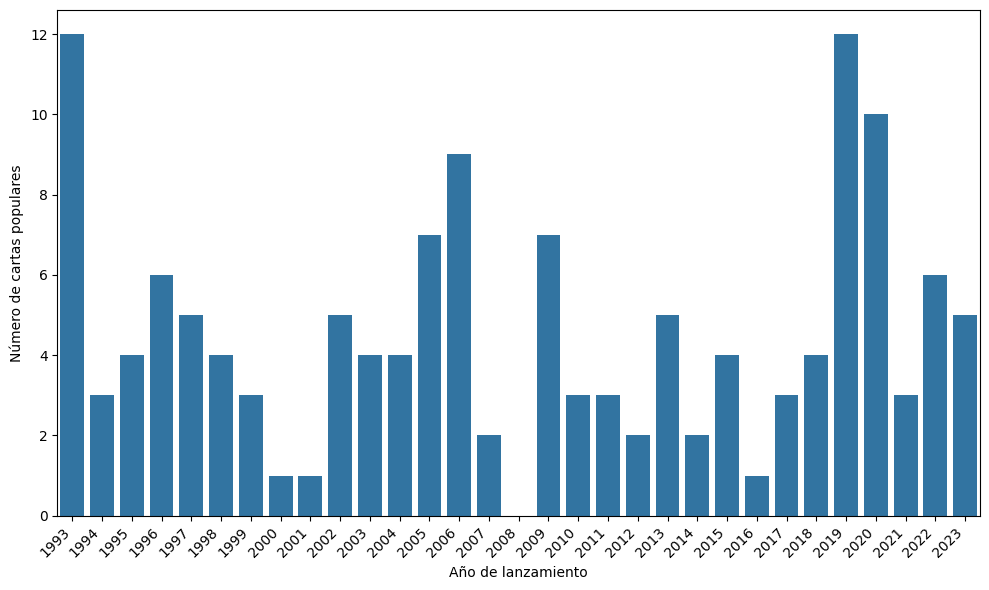

In [ ]:
umbral_popularidad = 250  

# Filtrar las cartas populares
df_populares = df_mazos[df_mazos["edhrec_rank"] <= umbral_popularidad]
# Contar cuántas cartas populares hay por año
df_grouped = df_populares.groupby("release_year")["Card Name"].count()
# Convertir el índice a tipo entero
df_grouped.index = df_grouped.index.astype(int)
# Asegurar que el índice es un rango continuo de años
df_grouped = df_grouped.reindex(range(df_grouped.index.min(), df_grouped.index.max() + 1), fill_value=0)
# Convertir el índice a string para que lo trate como categórico ordenado
df_grouped = df_grouped.reset_index()
df_grouped.columns = ["release_year", "num_popular_cards"]
df_grouped["release_year"] = df_grouped["release_year"].astype(str) 

# Crear la figura
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="release_year", y="num_popular_cards", data=df_grouped)

ax.set_xticks(range(len(df_grouped)))
ax.set_xticklabels(df_grouped["release_year"], rotation=45, ha='right')

plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de cartas populares')
plt.tight_layout()
plt.show()



In [ ]:
#Prueba para ver las cartas de estos años
df_201925 = df_mazos[(df_mazos["release_year"] >= 2019) & (df_mazos["release_year"] <= 2025)][["Card Name", "release_year", "edhrec_rank"]]
df_201925 = df_201925.sort_values(by="edhrec_rank")
df_201925  

,Card Name,release_year,edhrec_rank
3,Arcane Signet,2019,3
2738,Generous Gift,2019,43
79,Smothering Tithe,2019,48
1,An Offer You Can't Refuse,2022,54
25,Esper Sentinel,2021,67
...,...,...,...
4373,Hangar Scrounger,2023,12084
2094,Stock Up,2025,12207
2729,Expedited Inheritance,2024,12511
2593,This Town Ain't Big Enough,2024,13781


In [ ]:
# Calcular percentiles 
p90 = df_mazos["edhrec_rank"].quantile(0.90)  # Top 10%
p95 = df_mazos["edhrec_rank"].quantile(0.95)  # Top 5%
p99 = df_mazos["edhrec_rank"].quantile(0.99)  # Top 1%

print(f"Percentil 90: {p90}")
print(f"Percentil 95: {p95}")
print(f"Percentil 99: {p99}")

Percentil 90: 7129.499999999995
Percentil 95: 9538.599999999999
Percentil 99: 13683.69


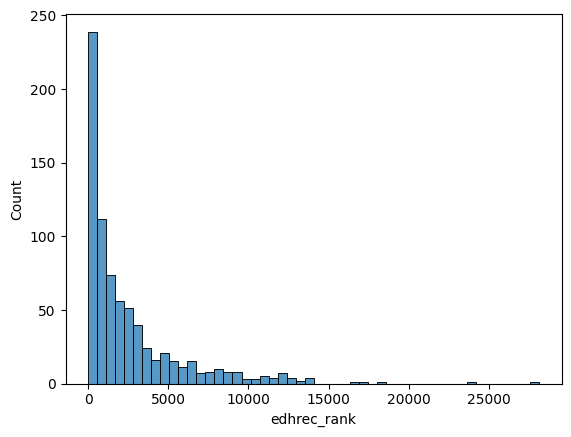

In [ ]:

sns.histplot(df_mazos["edhrec_rank"].dropna(), bins=50)

plt.show()

In [ ]:
#calcular cuanto mide cada bin
bins = 50

bin_size = (df_mazos["edhrec_rank"].max() - df_mazos["edhrec_rank"].min()) / bins
print(bin_size)

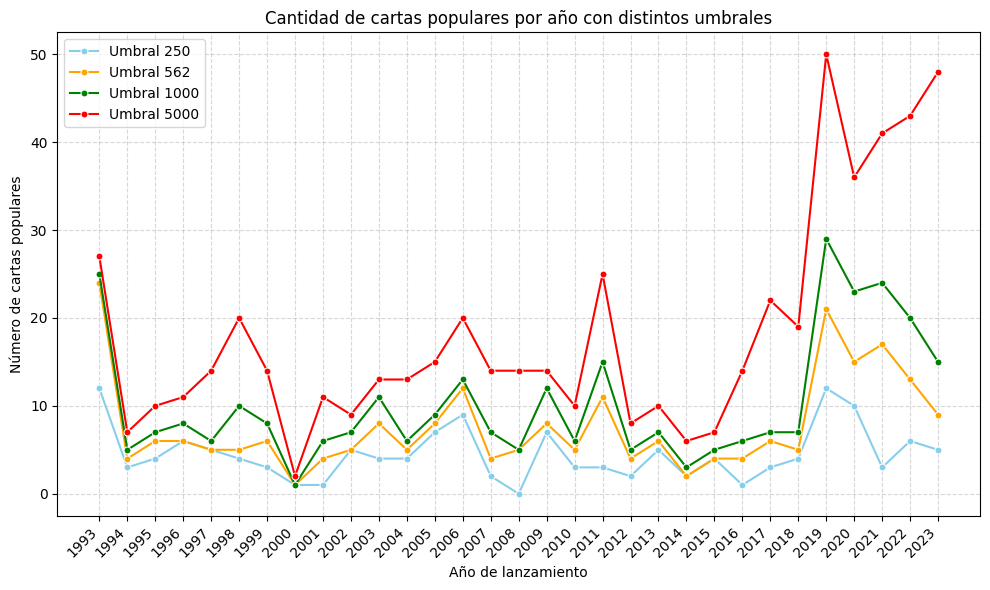

In [ ]:
#pRUEBA 

# Definir los umbrales
umbral_1 = 250
umbral_2 = 562
umbral_3 = 1000
umbral_4 = 5000

# Filtrar las cartas populares para cada umbral
df_populares_1 = df_mazos[df_mazos["edhrec_rank"] <= umbral_1]
df_populares_2 = df_mazos[df_mazos["edhrec_rank"] <= umbral_2]
df_populares_3 = df_mazos[df_mazos["edhrec_rank"] <= umbral_3]
df_populares_4 = df_mazos[df_mazos["edhrec_rank"] <= umbral_4]

# df_populares_10 = df_no_duplicados[df_no_duplicados["edhrec_rank"] <= umbral_1]
# df_populares_20 = df_no_duplicados[df_no_duplicados["edhrec_rank"] <= umbral_2]
# df_populares_30 = df_no_duplicados[df_no_duplicados["edhrec_rank"] <= umbral_3]
# df_populares_40 = df_no_duplicados[df_no_duplicados["edhrec_rank"] <= umbral_4]


# Agrupar por año y contar el número de cartas populares para cada umbral
df_grouped_1 = df_populares_1.groupby("release_year")["Card Name"].count()
df_grouped_2 = df_populares_2.groupby("release_year")["Card Name"].count()
df_grouped_3 = df_populares_3.groupby("release_year")["Card Name"].count()
df_grouped_4 = df_populares_4.groupby("release_year")["Card Name"].count()

# df_grouped_10 = df_populares_10.groupby("release_year")["Card Name"].count()
# df_grouped_20 = df_populares_20.groupby("release_year")["Card Name"].count()
# df_grouped_30 = df_populares_30.groupby("release_year")["Card Name"].count()
# df_grouped_40 = df_populares_40.groupby("release_year"["Card Name"].count()

# Convertir el índice a tipo entero
df_grouped_1.index = df_grouped_1.index.astype(int)
df_grouped_2.index = df_grouped_2.index.astype(int)
df_grouped_3.index = df_grouped_3.index.astype(int)
df_grouped_4.index = df_grouped_4.index.astype(int)

# df_grouped_10.index = df_grouped_10.index.astype(int)
# df_grouped_20.index = df_grouped_20.index.astype(int)
# df_grouped_30.index = df_grouped_30.index.astype(int)
# df_grouped_40.index = df_grouped_40.index.astype(int)


# Asegurarse de que el índice sea continuo
all_years = range(df_grouped_1.index.min(), df_grouped_1.index.max() + 1)
df_grouped_1 = df_grouped_1.reindex(all_years, fill_value=0)
df_grouped_2 = df_grouped_2.reindex(all_years, fill_value=0)
df_grouped_3 = df_grouped_3.reindex(all_years, fill_value=0)
df_grouped_4 = df_grouped_4.reindex(all_years, fill_value=0)

# df_grouped_10 = df_grouped_10.reindex(all_years, fill_value=0)
# df_grouped_20 = df_grouped_20.reindex(all_years, fill_value=0)
# df_grouped_30 = df_grouped_30.reindex(all_years, fill_value=0)
# df_grouped_40 = df_grouped_40.reindex(all_years, fill_value=0)

plt.figure(figsize=(10, 6))

# Línea para los tres umbrales
sns.lineplot(x=df_grouped_1.index, y=df_grouped_1.values, label=f'Umbral {umbral_1}', color='skyblue', marker='o', markersize=5)
sns.lineplot(x=df_grouped_2.index, y=df_grouped_2.values, label=f'Umbral {umbral_2}', color='orange', marker='o', markersize=5)
sns.lineplot(x=df_grouped_3.index, y=df_grouped_3.values, label=f'Umbral {umbral_3}', color='green', marker='o', markersize=5)
sns.lineplot(x=df_grouped_4.index, y=df_grouped_4.values, label=f'Umbral {umbral_4}', color='red', marker='o', markersize=5)

# sns.lineplot(x=df_grouped_10.index, y=df_grouped_10.values, label=f'Umbral {umbral_1}', color='skyblue', marker='o', markersize=5, ls="--")
# sns.lineplot(x=df_grouped_20.index, y=df_grouped_20.values, label=f'Umbral {umbral_2}', color='orange', marker='o', markersize=5, ls="--")
# sns.lineplot(x=df_grouped_30.index, y=df_grouped_30.values, label=f'Umbral {umbral_3}', color='green', marker='o', markersize=5, ls="--")
# sns.lineplot(x=df_grouped_40.index, y=df_grouped_40.values, label=f'Umbral {umbral_4}', color='red', marker='o', markersize=5, ls="--")

# Etiquetas y título
plt.xlabel("Año de lanzamiento")
plt.ylabel("Número de cartas populares")
plt.title("Cantidad de cartas populares por año con distintos umbrales")
plt.grid(visible=True, alpha=0.5, ls="--")
plt.legend()
plt.xticks(range(df_grouped_1.index.min(), df_grouped_1.index.max() + 1), rotation=45, ha='right')
plt.tight_layout()
plt.show()

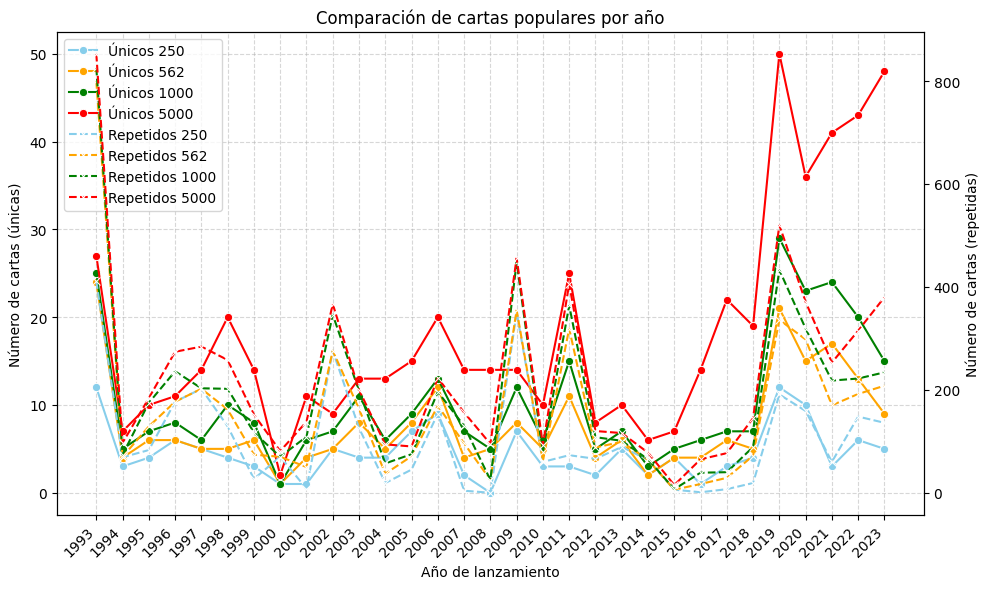

In [ ]:
# Definir los umbrales
umbral_1 = 250
umbral_2 = 562
umbral_3 = 1000
umbral_4 = 5000

# Filtrar las cartas populares para cada umbral
df_populares_1 = df_mazos[df_mazos["edhrec_rank"] <= umbral_1]
df_populares_2 = df_mazos[df_mazos["edhrec_rank"] <= umbral_2]
df_populares_3 = df_mazos[df_mazos["edhrec_rank"] <= umbral_3]
df_populares_4 = df_mazos[df_mazos["edhrec_rank"] <= umbral_4]

# Filtrar las cartas populares SIN duplicados
df_populares_10 = df_con_duplicados[df_con_duplicados["edhrec_rank"] <= umbral_1]
df_populares_20 = df_con_duplicados[df_con_duplicados["edhrec_rank"] <= umbral_2]
df_populares_30 = df_con_duplicados[df_con_duplicados["edhrec_rank"] <= umbral_3]
df_populares_40 = df_con_duplicados[df_con_duplicados["edhrec_rank"] <= umbral_4]

# Agrupar por año
def agrupar_por_anio(df):
    grouped = df.groupby("release_year")["Card Name"].count()
    grouped.index = grouped.index.astype(int)
    return grouped

df_grouped_1 = agrupar_por_anio(df_populares_1)
df_grouped_2 = agrupar_por_anio(df_populares_2)
df_grouped_3 = agrupar_por_anio(df_populares_3)
df_grouped_4 = agrupar_por_anio(df_populares_4)

df_grouped_10 = agrupar_por_anio(df_populares_10)
df_grouped_20 = agrupar_por_anio(df_populares_20)
df_grouped_30 = agrupar_por_anio(df_populares_30)
df_grouped_40 = agrupar_por_anio(df_populares_40)

# Asegurarse de que el índice sea continuo
all_years = range(min(df_grouped_1.index.min(), df_grouped_10.index.min()), 
                  max(df_grouped_1.index.max(), df_grouped_10.index.max()) + 1)

df_grouped_1 = df_grouped_1.reindex(all_years, fill_value=0)
df_grouped_2 = df_grouped_2.reindex(all_years, fill_value=0)
df_grouped_3 = df_grouped_3.reindex(all_years, fill_value=0)
df_grouped_4 = df_grouped_4.reindex(all_years, fill_value=0)

df_grouped_10 = df_grouped_10.reindex(all_years, fill_value=0)
df_grouped_20 = df_grouped_20.reindex(all_years, fill_value=0)
df_grouped_30 = df_grouped_30.reindex(all_years, fill_value=0)
df_grouped_40 = df_grouped_40.reindex(all_years, fill_value=0)

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Segundo eje Y
ax2 = ax1.twinx()

# Colores consistentes
colores = ["skyblue", "orange", "green", "red"]

# Graficar en el eje izquierdo (valores únicos)
sns.lineplot(x=all_years, y=df_grouped_1.values, label=f'Únicos {umbral_1}', color=colores[0], marker='o', ax=ax1)
sns.lineplot(x=all_years, y=df_grouped_2.values, label=f'Únicos {umbral_2}', color=colores[1], marker='o', ax=ax1)
sns.lineplot(x=all_years, y=df_grouped_3.values, label=f'Únicos {umbral_3}', color=colores[2], marker='o', ax=ax1)
sns.lineplot(x=all_years, y=df_grouped_4.values, label=f'Únicos {umbral_4}', color=colores[3], marker='o', ax=ax1)

# Graficar en el eje derecho (valores repetidos)
sns.lineplot(x=all_years, y=df_grouped_10.values, label=f'Repetidos {umbral_1}', color=colores[0], linestyle='--', marker='x', ax=ax2)
sns.lineplot(x=all_years, y=df_grouped_20.values, label=f'Repetidos {umbral_2}', color=colores[1], linestyle='--', marker='x', ax=ax2)
sns.lineplot(x=all_years, y=df_grouped_30.values, label=f'Repetidos {umbral_3}', color=colores[2], linestyle='--', marker='x', ax=ax2)
sns.lineplot(x=all_years, y=df_grouped_40.values, label=f'Repetidos {umbral_4}', color=colores[3], linestyle='--', marker='x', ax=ax2)

# Etiquetas
ax1.set_xlabel("Año de lanzamiento")
ax1.set_ylabel("Número de cartas (únicas)", color='black')
ax2.set_ylabel("Número de cartas (repetidas)", color='black')
plt.title("Comparación de cartas populares por año")

# Ticks y leyenda
ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(all_years)
ax1.set_xticklabels(all_years, rotation=45, ha='right')

# Leyendas combinadas
lines_labels_1 = ax1.get_legend_handles_labels()
lines_labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_labels_1[0] + lines_labels_2[0], lines_labels_1[1] + lines_labels_2[1], loc='upper left')
ax2.legend_.remove()

# Grid
ax1.grid(visible=True, alpha=0.5, ls='--')

# Layout ajustado
plt.tight_layout()
plt.show()


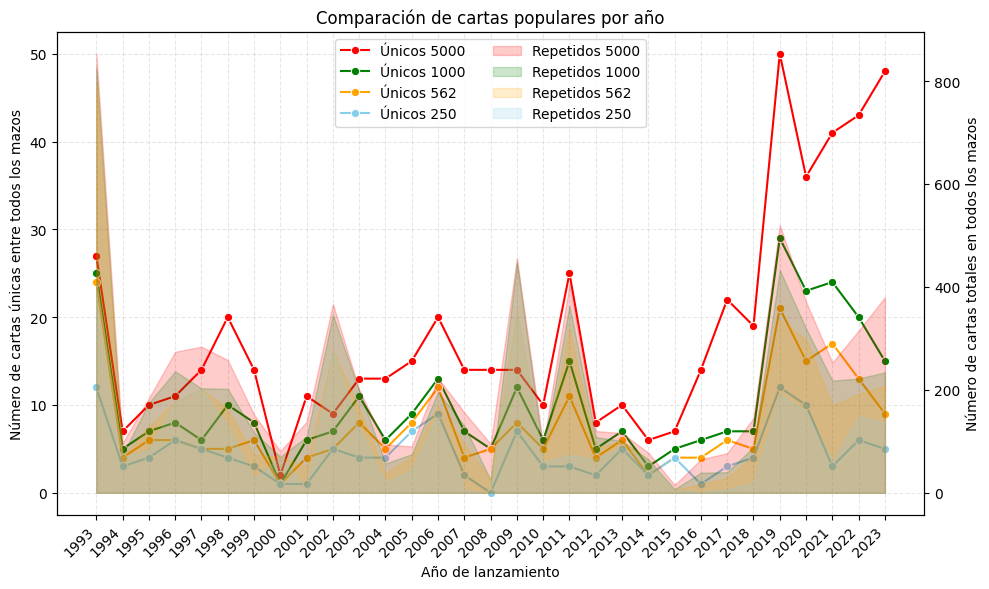

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Colores base
colores = ["skyblue", "orange", "green", "red"]

sns.lineplot(x=all_years, y=df_grouped_4.values, label=f'Únicos {umbral_4}', color=colores[3], marker='o', ax=ax1)
sns.lineplot(x=all_years, y=df_grouped_3.values, label=f'Únicos {umbral_3}', color=colores[2], marker='o', ax=ax1)
sns.lineplot(x=all_years, y=df_grouped_2.values, label=f'Únicos {umbral_2}', color=colores[1], marker='o', ax=ax1)
sns.lineplot(x=all_years, y=df_grouped_1.values, label=f'Únicos {umbral_1}', color=colores[0], marker='o', ax=ax1)

ax2.fill_between(all_years, df_grouped_40.values, color=colores[3], alpha=0.2, label=f'Repetidos {umbral_4}')
ax2.fill_between(all_years, df_grouped_30.values, color=colores[2], alpha=0.2, label=f'Repetidos {umbral_3}')
ax2.fill_between(all_years, df_grouped_20.values, color=colores[1], alpha=0.2, label=f'Repetidos {umbral_2}')
ax2.fill_between(all_years, df_grouped_10.values, color=colores[0], alpha=0.2, label=f'Repetidos {umbral_1}')

# Etiquetas y ejes
ax1.set_xlabel("Año de lanzamiento")
ax1.set_ylabel("Número de cartas únicas entre todos los mazos", color='black')
ax2.set_ylabel("Número de cartas totales en todos los mazos", color='black')
plt.title("Comparación de cartas populares por año")

# Ticks y leyenda
ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(all_years)
ax1.set_xticklabels(all_years, rotation=45, ha='right')

# Combinar leyendas
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper center', ncol= 2)

# Grid y layout
ax1.grid(True, alpha=0.3, ls="--")
plt.tight_layout()
plt.show()


Porcentajes de colores por año:
 color_category      B      G  Incoloro  Multicolor     R      U      W
release_year                                                          
2018             0.00   0.00     75.00        0.00  25.0   0.00   0.00
2019             8.33   8.33     50.00        8.33   0.0   8.33  16.67
2020            10.00  10.00     40.00        0.00  20.0  10.00  10.00
2021             0.00   0.00     66.67        0.00   0.0   0.00  33.33
2022            16.67   0.00     50.00        0.00   0.0  16.67  16.67
2023            40.00  20.00     40.00        0.00   0.0   0.00   0.00


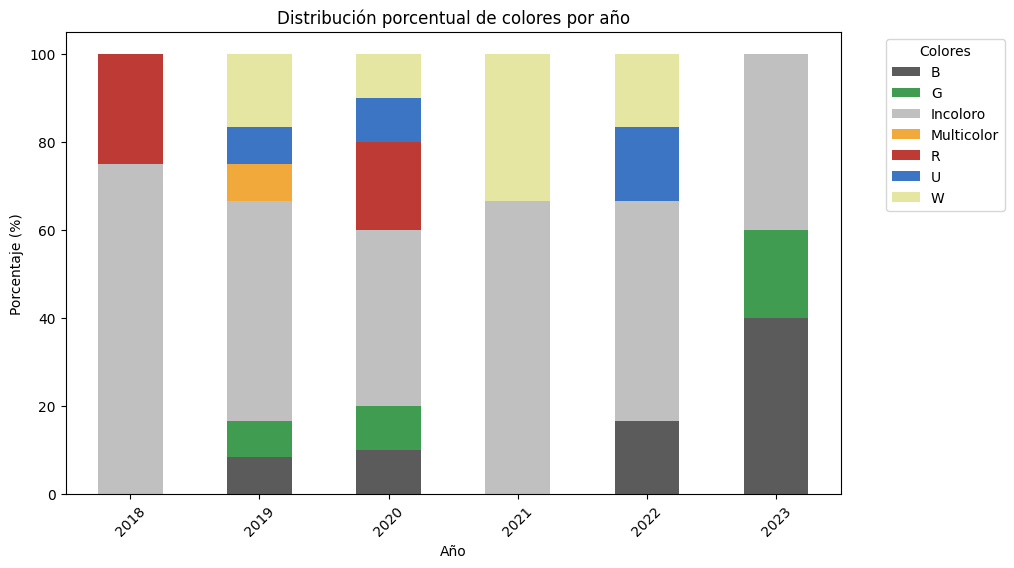

In [ ]:
import ast  
# Para convertir strings en listas reales
df_mazos["colors"] = df_mazos["colors"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Aplicar clasificación de colores
df_mazos["color_category"] = df_mazos["colors"].apply(funciones.classify_colors)
df_filtered = df_mazos[(df_mazos["release_year"].between(2018, 2024)) & (df_mazos["edhrec_rank"] < 250)]
# Agrupar por año y categoría de color
color_counts = df_filtered.groupby(["release_year", "color_category"]).size().unstack(fill_value=0)

color_map = {
    "W": "#E6E6A3", "U": "#3B75C4", "B": "#5B5B5B",
    "R": "#BE3A34", "G": "#3F9C50", "Incoloro": "#C0C0C0", "Multicolor": "#F2A93B"
}

# Calcular el porcentaje de cada color por año
color_percentages = color_counts.div(color_counts.sum(axis=1), axis=0) * 100
print("Porcentajes de colores por año:\n", color_percentages.round(2))


fig, ax = plt.subplots(figsize=(10, 6))
color_percentages.plot(kind="bar", stacked=True, color=[color_map[c] for c in color_counts.columns], ax=ax)

ax.set_ylabel("Porcentaje (%)")
ax.set_xlabel("Año")
ax.set_title("Distribución porcentual de colores por año")
ax.legend(title="Colores", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.show()

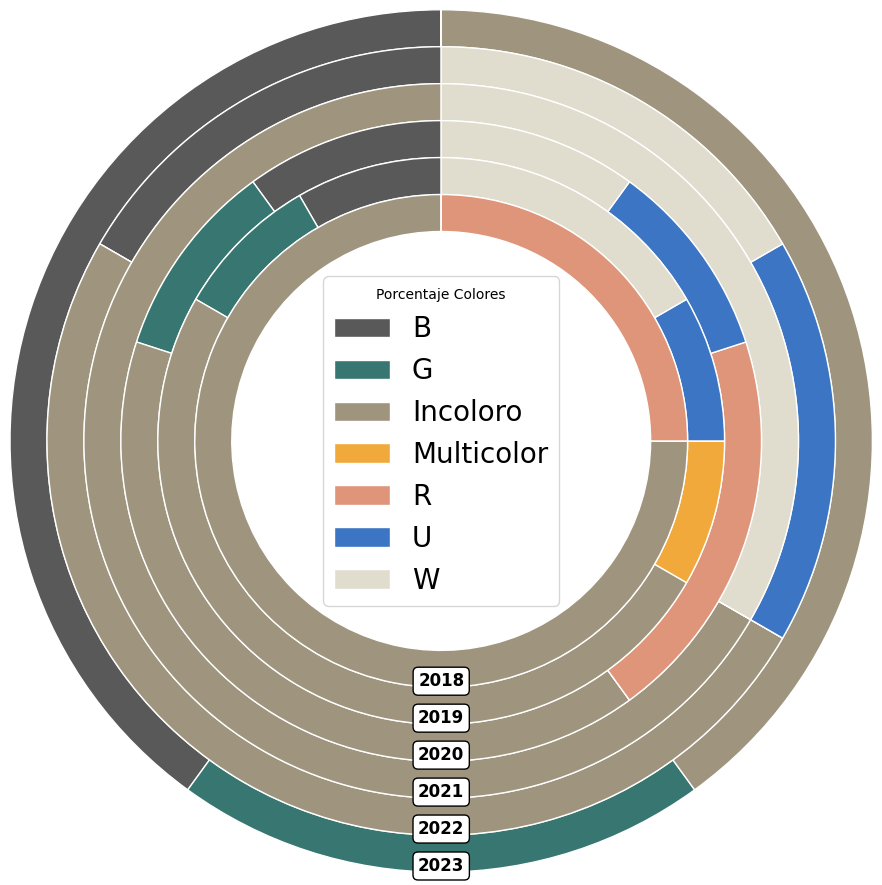

In [ ]:
import ast  # Para convertir strings en listas reales

# Asegurar que 'colors' sea lista en df_mazos
df_mazos["colors"] = df_mazos["colors"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df_mazos["color_category"] = df_mazos["colors"].apply(funciones.classify_colors)

df_filtered = df_mazos[(df_mazos["edhrec_rank"] < 250) & (df_mazos["release_year"].between(2018, 2024))]

df_filtered.head(20)

# Agrupar por año y color
color_counts = df_filtered.groupby(["release_year", "color_category"]).size().unstack(fill_value=0)

size = 0.15  
years = sorted(color_counts.index, reverse=True)
num_years = len(years)
base_radius = 1 + (num_years - 1) * size

#Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 8))

for i, year in enumerate(years):
    radius = base_radius - i * size  
    ax.pie(
        color_counts.loc[year],
        radius=radius,
        labels=None,
        colors=[graficos.color_map[c] for c in color_counts.columns],
        startangle=90,
        wedgeprops=dict(width=size, edgecolor='w')
    )

    # Etiquetas de año
    angle = -90  
    x_offset = (radius + size / 2) * np.cos(np.radians(angle))
    y_offset = (radius + size / 2) * np.sin(np.radians(angle)) + 0.1
    ax.text(x_offset, y_offset, str(year), ha='center', va='center', fontsize=12, fontweight='bold', 
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

ax.legend(color_counts.columns, loc="center", bbox_to_anchor=(0.5, 0.5), title="Porcentaje Colores", fontsize="20")
plt.show()

In [45]:
df_filtered

,Deck Name,Card Name,type_line,set,released_at,release_year,edhrec_rank,colors,color_category
1,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",An Offer You Can't Refuse,Instant,snc,2022-04-29,2022,54,[U],U
3,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Arcane Signet,Artifact,eld,2019-10-04,2019,3,[],Incoloro
18,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Deflecting Swat,Instant,c20,2020-04-17,2020,97,[R],R
25,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Esper Sentinel,Artifact Creature — Human Soldier,pmh2,2021-05-06,2021,67,[W],W
28,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Fierce Guardianship,Instant,c20,2020-04-17,2020,73,[U],U
31,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Force of Negation,Instant,mh1,2019-06-14,2019,246,[U],U
54,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Morphic Pool,Land,bbd,2018-06-08,2018,123,[],Incoloro
61,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Orcish Bowmasters,Creature — Orc Archer,ltr,2023-06-23,2023,237,[B],B
62,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver","Otawara, Soaring City",Legendary Land,pneo,2022-02-18,2022,92,[],Incoloro
79,"1 Kraum, Ludevic's Opus//1 Tymna the Weaver",Smothering Tithe,Enchantment,rna,2019-01-25,2019,48,[W],W
